In [65]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.projectC as im
import pywt
from numpy.linalg import inv

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


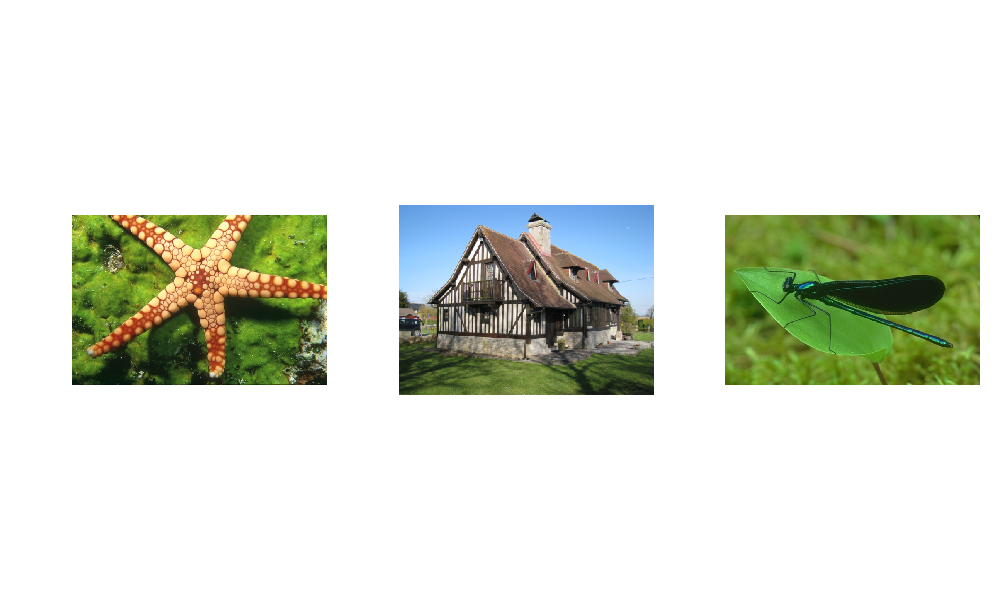

In [66]:
x0=plt.imread('assets/starfish.png')
y=plt.imread('assets/normandy.png')
z=plt.imread('assets/dragonfly.png')
fig, axes = plt.subplots(ncols=3)
im.show(x0, ax=axes[0])
im.show(y, ax=axes[1])
im.show(z, ax=axes[2])

<IPython.core.display.Javascript object>


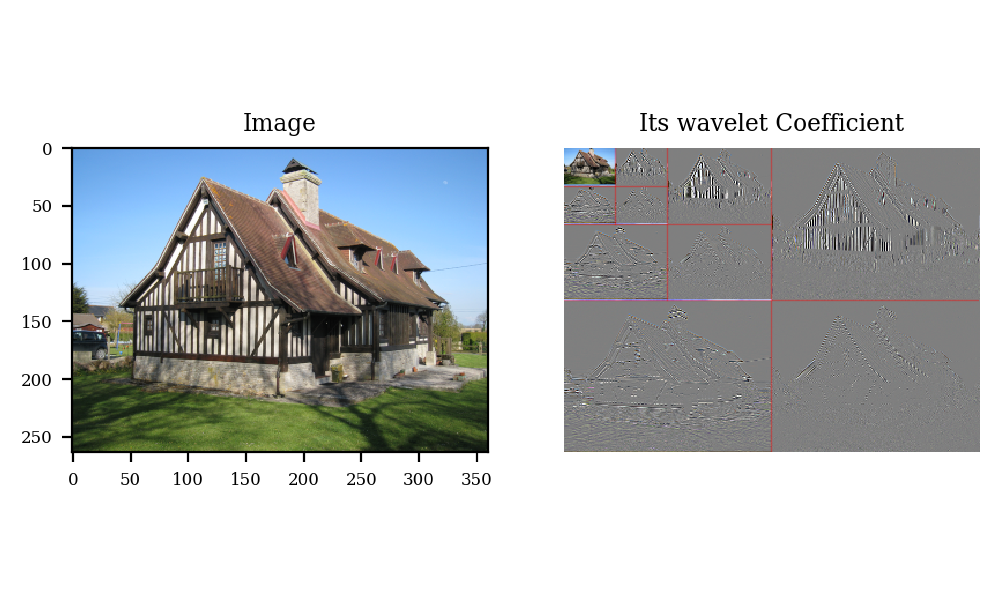

Text(0.5, 1.0, 'Its wavelet Coefficient')

In [67]:
#Q7,8 : Implement DWT function and display
x0=plt.imread('assets/normandy.png')
h,g = im.wavelet('db2')
J=3
x= im.dtw_crop(x0,J)        # Crop x to size of DWT, J=3
z_dwt= im.dwt(x,J,h,g)         # dwt of x

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(x)
axs[0].set_title('Image')
im.showdwt(z_dwt, J)
axs[1].set_title('Its wavelet Coefficient')


<IPython.core.display.Javascript object>


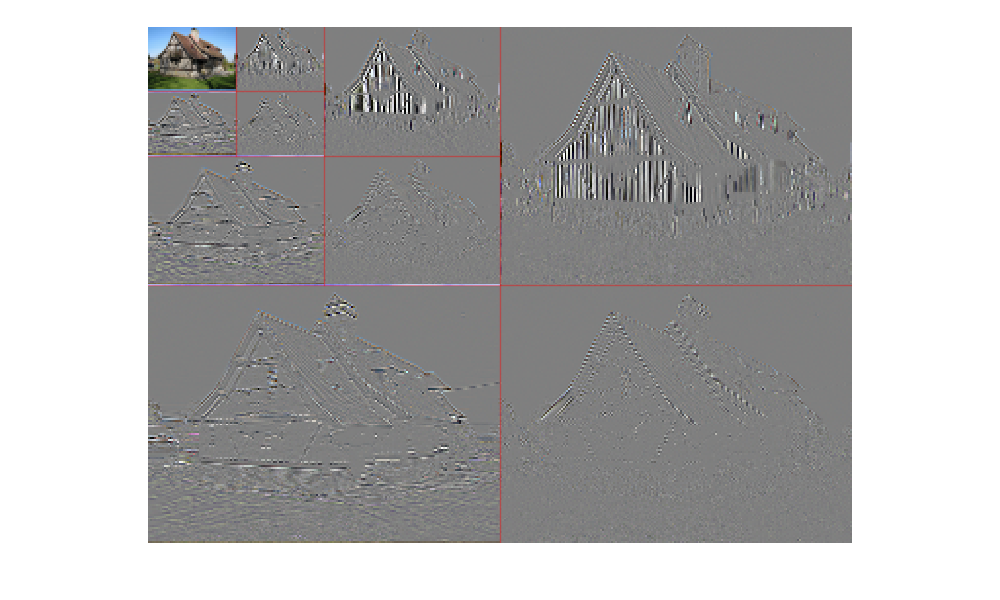

In [29]:
#Q9: Implement IDWT function :
    # Solved in ProjetC.py
plt.figure()
im.showdwt(z_dwt,J)

<IPython.core.display.Javascript object>


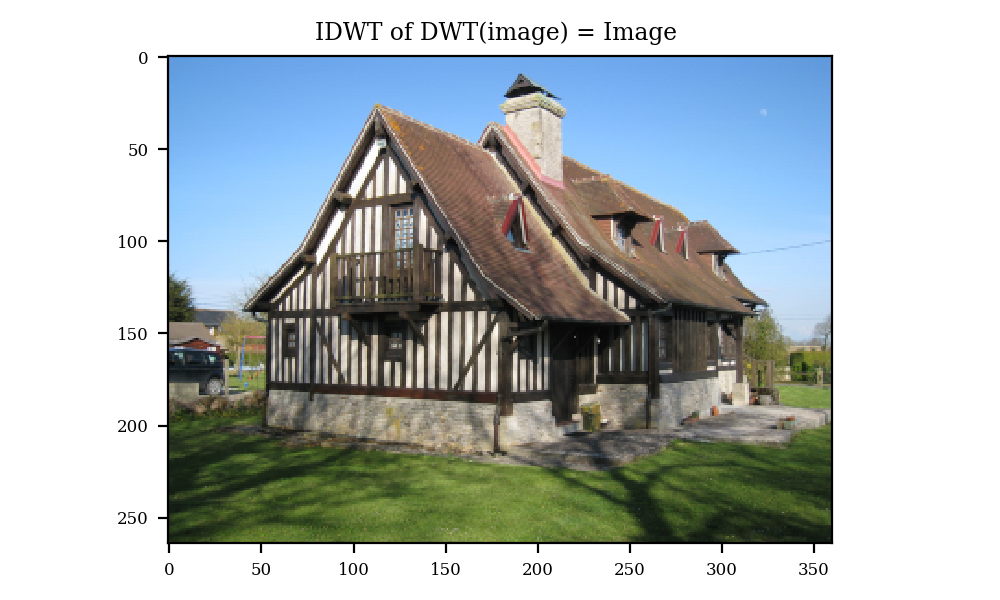

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<IPython.core.display.Javascript object>


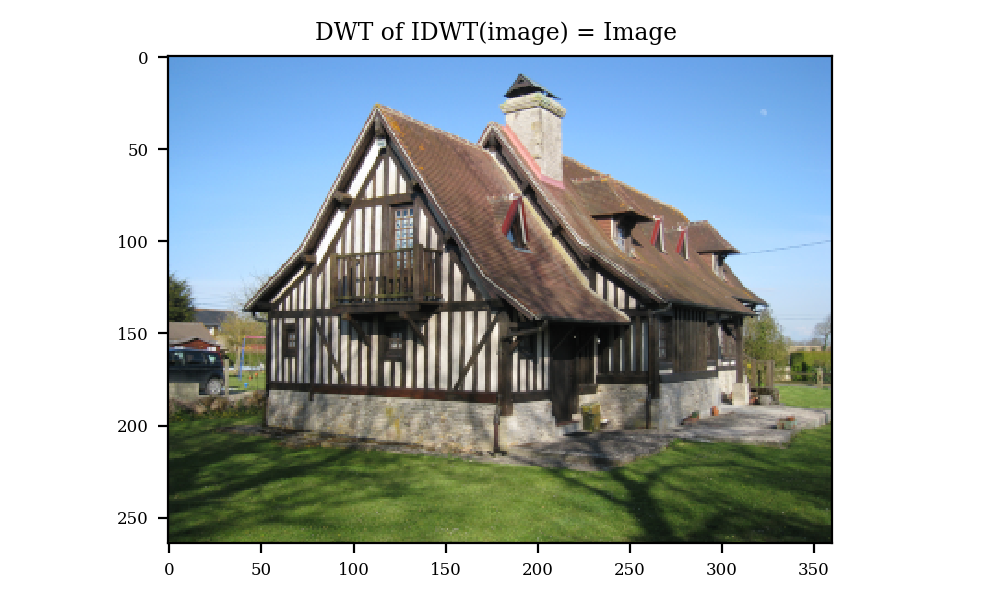

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


** Display shows that the proof correctly


In [68]:
# Q10: Check DWT and IDWT vs Inverse version
    # DWT -> IDWT:
z_dwt= im.dwt(x,J,h,g) 
z_idwt = im.idwt(z_dwt,J,h,g)

fig, axs = plt.subplots()
axs.imshow(z_idwt)
axs.set_title('IDWT of DWT(image) = Image ')

     # IDWT -> DWT
x_idwt = im.idwt(x,J,h,g)
x= im.dwt(x_idwt,J,h,g) 
fig, axs = plt.subplots()
axs.imshow(x)
axs.set_title('DWT of IDWT(image) = Image ')
print('** Display shows that the proof correctly')


<IPython.core.display.Javascript object>


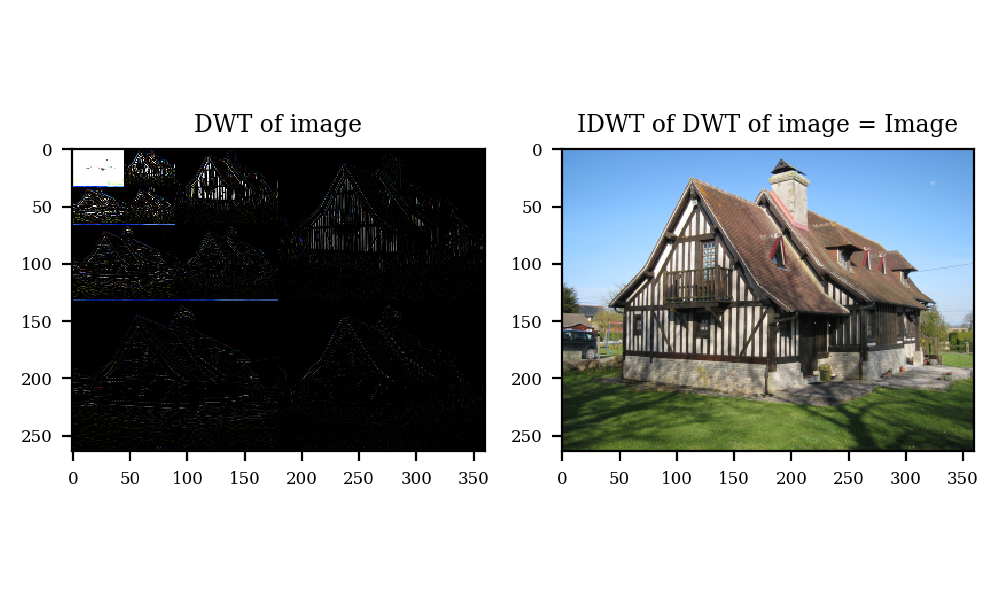

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<IPython.core.display.Javascript object>


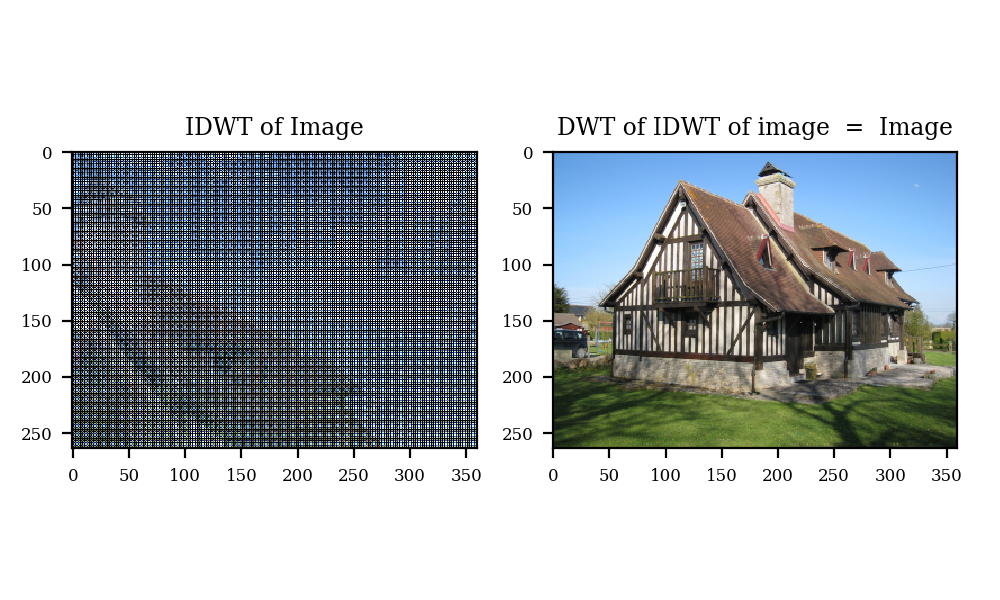

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


** Invert() show the proof correctly
(264, 360, 1)
(264, 360, 1)
** np.isclose(p,p1)=True, shows that power(self) was implemented correctly to match with dwt_power(n1,n2,J)


In [87]:
#Q11: Implement Invert() , Power(), use Class DWT :
    # DWT -> IDWT
x0=plt.imread('assets/normandy.png')
x=im.dtw_crop(x0,J)
W= im.DWT(x.shape[:2],J, name='db2')  # Call Object W from class DWT
z_dwt = W.__call__(x0)                # Take DWT
x_idwt = W.invert(z_dwt)              # Take IDWT
fig, axs = plt.subplots(ncols=2)
axs[0].set_title('DWT of image')
#im.showdwt(z_dwt, J)
axs[0].imshow(z_dwt)
axs[1].imshow(x_idwt)
axs[1].set_title('IDWT of DWT of image = Image')

        # DWT -> IDWT  
x_idwt = W.invert(x0)              # Take IDWT
x = W.__call__(x_idwt)             # Take DWT
fig, axs = plt.subplots(ncols=2)
axs[0].set_title('IDWT of Image')
#im.showdwt(x_idwt, J)
axs[0].imshow(x_idwt)
axs[1].imshow(x)
axs[1].set_title('DWT of IDWT of image  =  Image')
print('** Invert() show the proof correctly')

    # Check if Power(self) = dwt_power(n1,n2,J)
x=im.dtw_crop(x0,J)
n1,n2= x.shape[:2]
p1= im.dwt_power(n1,n2,J,)
p= W.power()
print(p.shape)
print(p1.shape)

np.isclose(p,p1)
print('** np.isclose(p,p1)=True, shows that power(self) was implemented correctly to match with dwt_power(n1,n2,J)')


In [72]:
# Q12: Thresholding
def softthresh(z, t):
    new_z = (z - np.sign(z-t) * t) * np.maximum(np.abs(z)-t,0).astype(bool) # conversion to bool maps to (0,1)
    return new_z

<IPython.core.display.Javascript object>


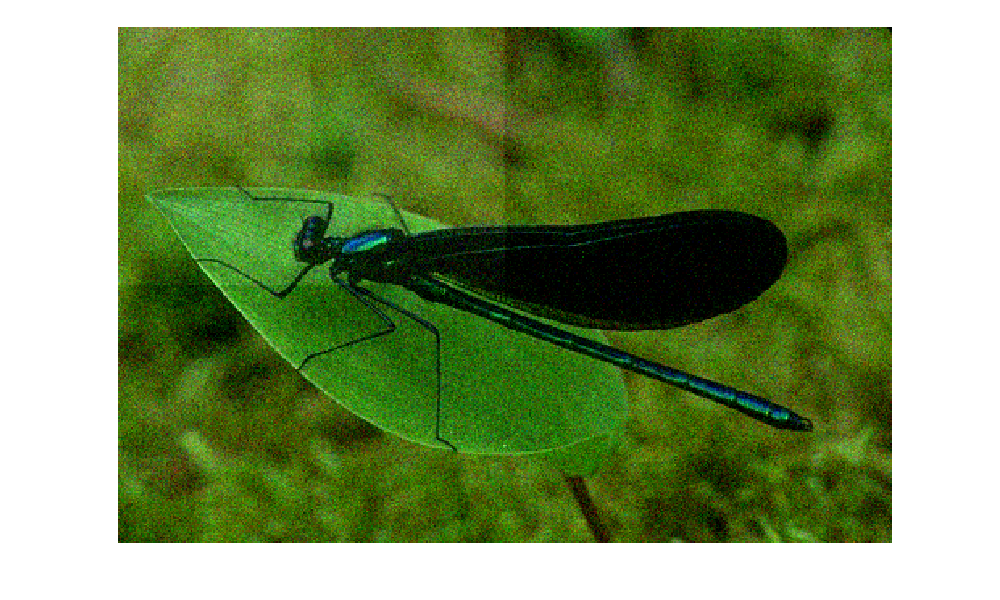

(320, 480, 3)


<IPython.core.display.Javascript object>


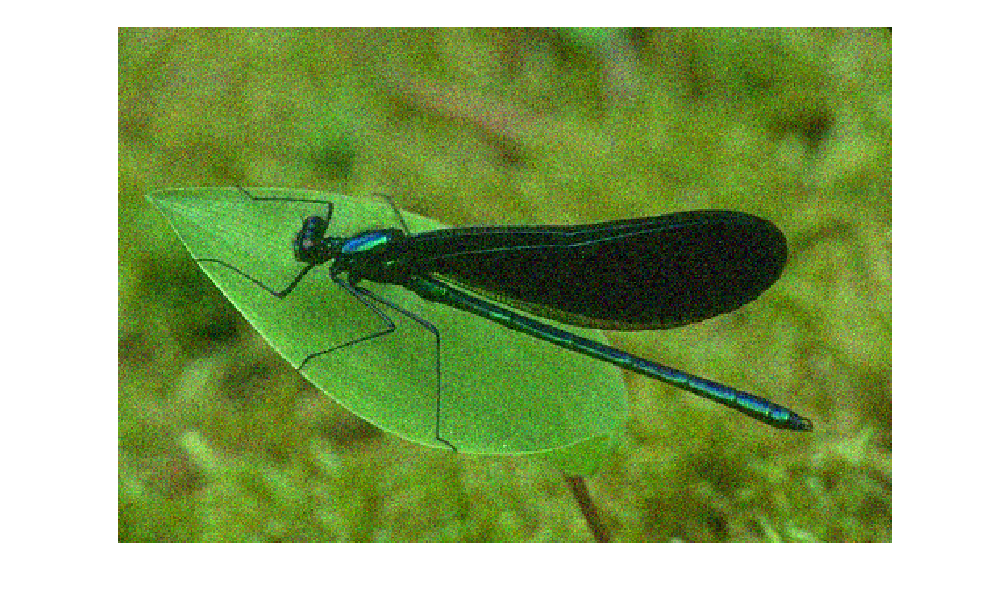

In [99]:
# Q13: Denoise 
def softthresh_denoise(y, sig, W, alpha=10/255):

    p= W.power()
    lamda=np.zeros(p.shape[:2])
    tau=np.zeros(p.shape[:2])
    lamda = alpha*p
    tau= (np.sqrt(2)*(sig**2))/lamda
    denoise= softthresh(y,tau)
    return denoise

sig= 20/255
x0=plt.imread('assets/dragonfly.png')
x0= im.dtw_crop(x0,J)
y_noise= x0 + sig * np.random.randn(*x0.shape)
W= im.DWT(y_noise.shape[:2],J, name='db2')  # Call Object W from class DWT

y_denoise = softthresh_denoise(y_noise, sig, W, alpha=14/255)
plt.figure()
im.show(y_denoise)
print(x0.shape)
plt.figure()
im.show(y_noise)

In [104]:
def PSNR(noise, denoise):
    mse = np.mean((noise - denoise) ** 2 )
    PIXEL_MAX = 255
    return 10 * np.log10(PIXEL_MAX**2 / (mse))

psnr = PSNR(y_noise,y_denoise)
print(psnr)



65.77908913250356


In [83]:
print(x0.shape)
print(p.shape)
lamda=np.zeros(p.shape[:2])

print(lamda.shape)



(320, 480, 3)
(264, 360, 1)
(264, 360)
